# Problem Definition
## Latar Belakang
Email adalah salah satu komponen penting dalam internet. Beragam aktivitas dapat dilakukan melalui email, seperti menerima pesan, mengirimkan file project, menghubungkan email ke media sosial dan platform penting lainnya. Namun, tak jarang terdapat oknum yang memanfaatkan email untuk melakukan kejahatan seperti penipuan, pencurian informasi, dan lain sebagainya. Oleh karena itu, kita perlu lebih waspada dalam menerima email, terutama email mencurigakan yang seringkali mengirimkan pesan penipuan ke berbagai email acak.
## Tujuan Penelitian
Dengan mengembangkan model ai yang dapat mengklasifikasikan suatu email spam, dengan begitu berharap bahwa penipuan yang dilakukan menggunakan email dapat dihindarkan.
## Rumusan Masalah
Bagaimana caranya mendeteksi suatu email itu spam atau bukan untuk identifikasi tanda penipuan.
## Data yang akan dipakai
*   Dataset : Spam Mails Datase
*   Author : VENKATESH GARNEPUDI
*   Link : https://www.kaggle.com/datasets/venky73/spam-mails-dataset?resource=download


## Metode
SVC(Support Vector Classifier), Decision Tree, Random Forest, K-Neighbors.

# Preparation | Persiapan
## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

## Get Data | Mendapatkan Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #ambil data dari drive *biar ga harus upload-upload mulu aja sih, kalo manual gausah drive.mount upload bae
dataset_path = '/content/drive/MyDrive/spam_ham_dataset.csv' #ganti path sesuai nyimpen datasetnya

Mounted at /content/drive


In [ ]:
df = pd.read_csv(dataset_path)

## Explore Data (EDA) | Eksplorasi Data

In [ ]:
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [ ]:
# Filter data for rows with label 'ham'
data_ham = df[df['label'] == 'ham']

# Display the filtered DataFrame
print(data_ham)

      Unnamed: 0 label                                               text  \
0            605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1           2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2           3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
4           2030   ham  Subject: re : indian springs\r\nthis deal is t...   
5           2949   ham  Subject: ehronline web address change\r\nthis ...   
...          ...   ...                                                ...   
5165        2849   ham  Subject: fw : crosstex energy , driscoll ranch...   
5166        1518   ham  Subject: put the 10 on the ft\r\nthe transport...   
5167         404   ham  Subject: 3 / 4 / 2000 and following noms\r\nhp...   
5168        2933   ham  Subject: calpine daily gas nomination\r\n>\r\n...   
5169        1409   ham  Subject: industrial worksheets for august 2000...   

      label_num  
0             0  
1             0  
2             0  
4  

In [ ]:
df.describe()

,Unnamed: 0,label_num
count,5171.000000,5171.000000
mean,2585.000000,0.289886
std,1492.883452,0.453753
min,0.000000,0.000000
25%,1292.500000,0.000000
50%,2585.000000,0.000000
75%,3877.500000,1.000000
max,5170.000000,1.000000


In [ ]:
df.count()

Unnamed: 0    5171
label         5171
text          5171
label_num     5171
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


Text(0.5, 1.0, 'Persentase banyaknya data')

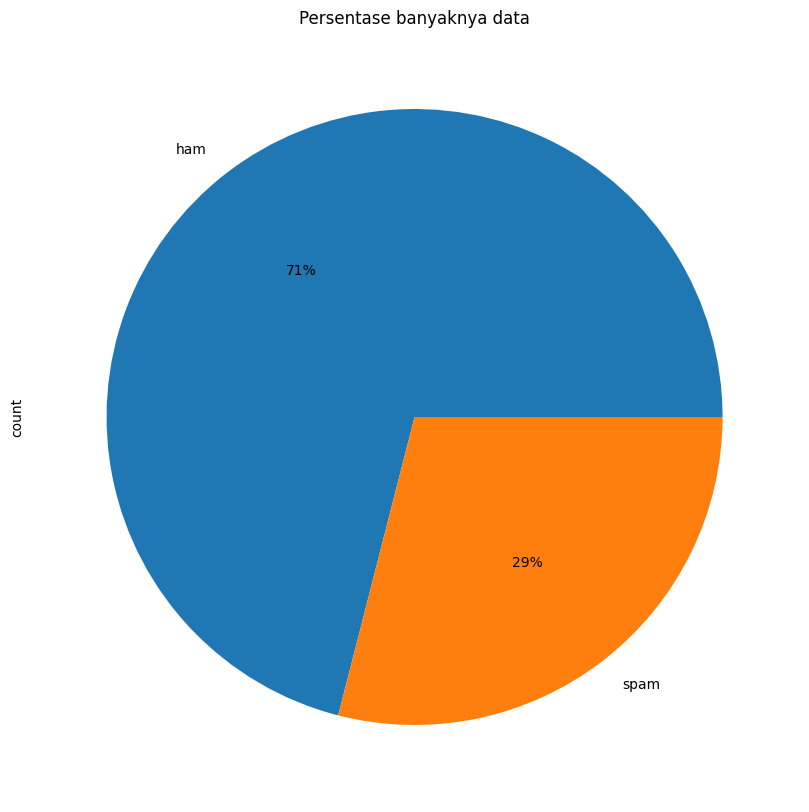

In [ ]:
plt.figure(figsize = (10, 10)) #ukuran gambar 10x10
df['label'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')
plt.title('Persentase banyaknya data')

In [ ]:
df.isnull().sum() #cek apakah data ada yang null

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
df.duplicated().sum() #cek apakah data ada yang duplikat?

0

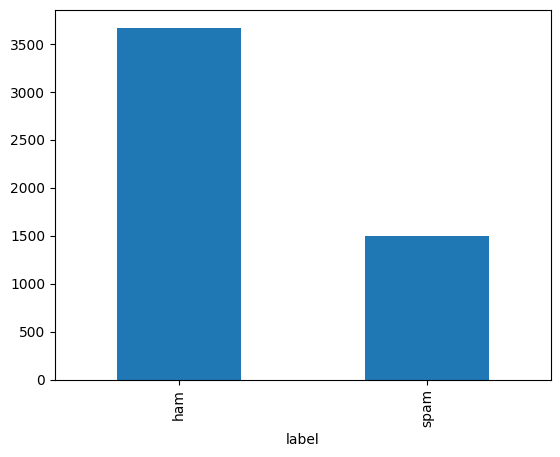

In [ ]:
spam_counts = df['label'].value_counts() #hitung berdasarkan jumlah total label
spam_counts.plot(kind='bar', x='label', y='value_counts')
plt.show()

## Clean Data | Membersihkan Data

In [ ]:
df.drop(columns = ['Unnamed: 0'], inplace = True) #Menghapus Kolom Unnamed : 0 karna ga kepake

In [ ]:
df.info() #kolom Unnamed: 0 dah dihapus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [ ]:
df.head()

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#Nenghapus kalimat aneh menjadi kalimat baru
from nltk.tokenize import RegexpTokenizer

def clean_str(string, reg = RegexpTokenizer(r'[a-z]+')):
    string = string.lower()
    tokens = reg.tokenize(string)
    return " ".join(tokens)

In [ ]:
df['text_clean'] = df['text'].apply(lambda string: clean_str(string)) #menambahkan text_clean ke kolom baru dataset

In [ ]:
df.head()

,label,text,label_num,text_clean
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,subject enron methanol meter this is a follow ...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,subject hpl nom for january see attached file ...
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,subject neon retreat ho ho ho we re around to ...
3,spam,"Subject: photoshop , windows , office . cheap ...",1,subject photoshop windows office cheap main tr...
4,ham,Subject: re : indian springs\r\nthis deal is t...,0,subject re indian springs this deal is to book...


# Model Training | Pelatihan Model

## ***SVC***

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(df.text_clean) #Training model berdasarkan contoh kalimat yang ada
y = df['label'].str.lower() # Outputnya nanti apakah ham(bukan spam) atau spam

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True) #test_size 20%, normalnya 70-30 / 80-20 (%)

In [ ]:
svc_model = SVC(kernel = 'rbf', random_state = None) #model pake SVC dari SVM, informasi parameter ada di website sckit-learn cari SVC
svc_model.fit(X_train, y_train) #fit model train

SVC()

In [ ]:
svc_prediction = svc_model.score(X_test,y_test) #simpan model di variable predictions

## ***Decision Tree***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', splitter='best',max_depth = 15,
                            min_samples_split=20)

In [ ]:
dt.fit(X_train,y_train) #Training data

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=20)

In [ ]:
dt_prediction = dt.predict(X_test)

## ***Random Forest***

In [ ]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier


# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=50)  # Sesuaikan n_estimators sesuai kebutuhan

# Melatih Model
rf_model.fit(X_train, y_train)

# Melakukan Prediksi pada Data Uji
y_pred = rf_model.predict(X_test)

# Perhitungan Akurasi Training
accuracy_train = accuracy_score(y_train, rf_model.predict(X_train))

# Perhitungan Metrik Performa pada Data Uji
predictionTest = rf_model.predict(X_test)
accuracy = accuracy_score(predictionTest, y_pred)

# Validasi Silang
cv = KFold(n_splits=5, shuffle=True, random_state=42)
rf_accuracy_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')

# Menampilkan Hasil
print("Accuracy Training:", accuracy_train)
print("Accuracy:", accuracy)
print("Accuracy scores (cross-validation):", rf_accuracy_scores)
print("Accuracy rata-rata (cross-validation):", np.mean(rf_accuracy_scores))


Accuracy Training: 1.0
Accuracy: 1.0
Accuracy scores (cross-validation): [0.96376812 0.96009674 0.97097944 0.96614268 0.94316808]
Accuracy rata-rata (cross-validation): 0.9608310113383454


## ***K-Neighbors Classifier***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn_model = KNeighborsClassifier()
kn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
kn_prediction = kn_model.score(X_test,y_test)

# Model Evaluation | Evaluasi Model

In [ ]:
from sklearn.metrics import accuracy_score

print(f'Akurasi model SVC: {svc_prediction * 100:.2f}%')
print(f'Akurasi model Decision Tree: {accuracy_score(dt_prediction, y_test) * 100:.2f}%')
print(f'Akurasi model Random Forest: {np.mean(rf_accuracy_scores) * 100:.2f}%')
print(f'Akurasi model K-Neighbors: {kn_prediction * 100:.2f}%')

Akurasi model SVC: 96.62%
Akurasi model Decision Tree: 93.14%
Akurasi model Random Forest: 96.08%
Akurasi model K-Neighbors: 87.54%


## Conclusion | Kesimpulan

Dengan menggunakan pelatihan Support Vector Classifier dari SVM, model dapat sudah dapat membedakan ciri-ciri dari teks yang biasa dipakai untuk melakukan spam pada email.